## Building own recommendation system for products on an e-commerce website like Amazon.com

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df  = pd.read_csv("ratings_Electronics.csv",)
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [3]:
df.columns

Index(['AKM1MP6P0OYPR', '0132793040', '5.0', '1365811200'], dtype='object')

In [4]:
#column name given to dataset
rating = pd.read_csv("ratings_Electronics.csv",names=["userId","productId","ratings","timestamp"])
rating.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
rating.shape

(7824482, 4)

In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [7]:
rating.isna().sum()    # no missing values

userId       0
productId    0
ratings      0
timestamp    0
dtype: int64

In [8]:
# discard timestamp column as not required
rating = rating.drop("timestamp",axis = 1)

In [9]:
rating.columns

Index(['userId', 'productId', 'ratings'], dtype='object')

In [10]:
rating.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [11]:
rating["userId"].value_counts().head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userId, dtype: int64

In [12]:
rating["userId"].value_counts().tail()

A1FK6VDJ9RP69     1
AMCR49EAGL17      1
A3DQKKBSDOHSQT    1
A3N6LJB0C4R8X8    1
A26KQ9RCO41POL    1
Name: userId, dtype: int64

In [13]:
rating['productId'].value_counts().head()

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: productId, dtype: int64

In [14]:
rating['productId'].value_counts().tail()

B005NG713U    1
B0004NMG46    1
B00AEFF8DU    1
B00CVFKDPY    1
B00GD4P2A0    1
Name: productId, dtype: int64

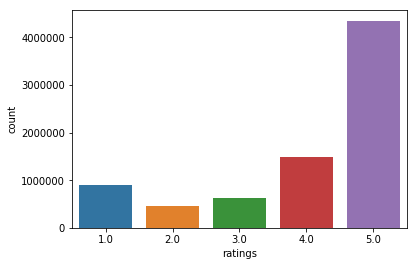

In [15]:
sns.countplot(rating['ratings'])

In [16]:
rating["ratings"].value_counts()    # More than half ratings are rated 5 

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

In [17]:
print(len(rating["productId"].unique()))   # lakhs of different products 
print(len(rating["userId"].unique()))
print(len(rating["ratings"].unique()))

476002
4201696
5


In [18]:
rating.groupby("productId")["ratings"].count().sort_values(ascending = False).head() # products rated by many users

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: ratings, dtype: int64

In [19]:
rating.groupby("productId")["ratings"].count().sort_values(ascending = False).tail()   # many products are rated only once

productId
B0058FM5IM    1
B0058FM320    1
B0058FM0M8    1
B0058FM05U    1
0132793040    1
Name: ratings, dtype: int64

In [20]:
rating.groupby('productId')['ratings'].mean().sort_values(ascending=False).head(10)

productId
BT008V9J9U    5.0
B0058PPK8Y    5.0
B0058OQ9Q2    5.0
B0058OKSMS    5.0
B0058OHGX2    5.0
B0058O9OR8    5.0
B0058O6O8K    5.0
B0058O6J3A    5.0
B0058O6EXA    5.0
B0058O0CMO    5.0
Name: ratings, dtype: float64

In [21]:
rating.groupby("userId")["ratings"].count().head()    # some user have rated less products

userId
A00000262KYZUE4J55XGL    1
A000063614T1OE0BUSKUT    2
A00009182QVLSWIGHLS1B    1
A00009661LC9LQPGKJ24G    1
A00010809P09NUU6ZP6H     1
Name: ratings, dtype: int64

###### The products with highest ratings are supposed to be more  popular products and they will be fit for popularity recommendation also  if  a new user without any purchasing history is concerned, will be recommended the highly rated popular products 
###### There ae many one time users who have given rating only once, those can be discarded to have more frequent users to render better recommendation

### Taking subset of dataset and keeping the users only who has given 50 or more number of ratings, to make it less sparse/more dense

In [22]:
rating1 = rating['userId'].value_counts()
rating_sub = rating[rating['userId'].isin(rating1[rating1 >= 50].index)]
# rating_sub = rating[rating.groupby('userId').userId.transform(len) > 50]

In [23]:
rating_sub.head()

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [24]:
rating_sub.shape    

(125871, 3)

In [81]:
rating_sub1 = rating_sub.head(50000)      # Due to memory issue dataframe subset done with  reduced data for colloborative filtering

In [82]:
rating_sub1.shape

(50000, 3)

### splitting data into train and test in ratio 70:30 , using surprise library 

In [83]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
rating_df = Dataset.load_from_df(rating_sub1[['userId', 'productId', 'ratings']], reader,)
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(rating_df,test_size=.30,random_state=7)

In [84]:
len(testset)     # Due to memory issue dataframe subset done with  reduced data for colloborative filtering

15000

In [85]:
testset[0:5]

[('A3Q4TYJVAM4IRM', 'B001IWOBA4', 4.0),
 ('A2RN2AO4BE6F4K', 'B001L2MJO6', 5.0),
 ('A7QMQBGJ2TCQG', 'B000A6NV0U', 1.0),
 ('A2ARDVMUGDFED6', 'B000KZ70JE', 5.0),
 ('A10ZBR6O8S8OCY', 'B000FTLOL0', 4.0)]

#### Popularity Recommender model

In [37]:
ratings_mean_count = pd.DataFrame(rating_sub.groupby('productId')['ratings'].mean())

In [38]:
ratings_mean_count['rating_counts'] = pd.DataFrame(rating_sub.groupby('productId')['ratings'].count()) 

In [39]:
ratings_mean_count.head().sort_values('rating_counts',ascending = False)  # gives the mean rating of product and number of ratings for the product

,ratings,rating_counts
productId,,
1400501466,3.333333,6
0972683275,4.750000,4
0970407998,2.500000,2
0594451647,5.000000,1
0594481813,3.000000,1


In [40]:
ratings_mean_count['popular'] = ratings_mean_count['ratings']*ratings_mean_count['rating_counts']
ratings_mean_count.head().sort_values("popular",ascending=False).reset_index()

,productId,ratings,rating_counts,popular
0,1400501466,3.333333,6,20.0
1,0972683275,4.750000,4,19.0
2,0594451647,5.000000,1,5.0
3,0970407998,2.500000,2,5.0
4,0594481813,3.000000,1,3.0


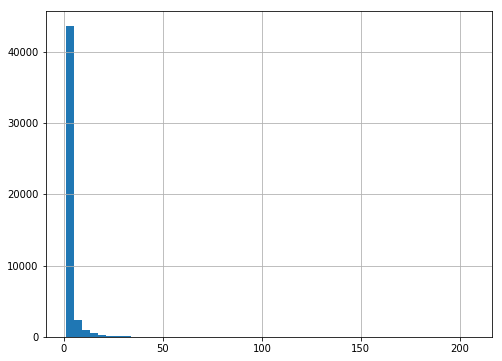

In [60]:
plt.figure(figsize=(8,6))
ratings_mean_count['rating_counts'].hist(bins=50)

Popularity based model is not a personalized model and it is based only on the popularity of the product among customer. 
So, it would be same for every new user.

### Collaborative Filtering model

In [86]:
rating_df
type(trainset)

surprise.trainset.Trainset

In [87]:
user_records = trainset.ur     #Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library
type(user_records)

collections.defaultdict

In [88]:
user_records

defaultdict(list,
            {0: [(0, 3.0),
              (54, 4.0),
              (533, 3.0),
              (710, 4.0),
              (713, 2.0),
              (1411, 4.0),
              (663, 3.0),
              (2499, 3.0),
              (2966, 4.0),
              (3036, 4.0),
              (3053, 4.0),
              (3238, 4.0),
              (1097, 4.0),
              (964, 4.0),
              (979, 5.0),
              (4099, 4.0),
              (467, 4.0),
              (5216, 4.0),
              (144, 3.0),
              (5396, 5.0),
              (5611, 3.0),
              (5670, 4.0),
              (3260, 4.0),
              (635, 4.0),
              (1848, 4.0),
              (532, 1.0),
              (7214, 2.0),
              (2197, 4.0),
              (7489, 3.0),
              (7909, 1.0),
              (8139, 4.0),
              (6564, 4.0),
              (8347, 4.0),
              (8372, 4.0),
              (2198, 4.0),
              (8801, 4.0),
              (2168, 3

In [89]:
print(trainset.to_raw_uid(0))          # However the ids are the inner ids and not the raw ids 
print(trainset.to_raw_iid(1066))       # raw ids can be obatined as follows

A17BUUBOU0598B
B000E9VKUQ


In [93]:
trainset.to_inner_iid("B000E9VKUQ")

1066

In [94]:
len(testset)

15000

In [95]:
# Training the model
from surprise import KNNWithMeans
from surprise import accuracy

In [145]:
algo = KNNWithMeans(k=5 ,sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


#### RMSE value

In [146]:
# Evalute on test set with Collaborative Filtering Model
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.1930


1.1930232573171473

In [147]:
# View a particular prediction
test_pred[10]

# To access a particular value, say estimate simply mention test_pred[12].est

Prediction(uid='A2AY4YUOX2N1BQ', iid='B00005YV57', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False})

### top-K(K=5)recommendations

In [148]:
testset_new = trainset.build_anti_testset()

In [155]:
len(testset_new)

26942625

In [156]:
testset_new[0:5]

[('A17BUUBOU0598B', 'B000XRVW52', 4.251228571428571),
 ('A17BUUBOU0598B', 'B002M78L64', 4.251228571428571),
 ('A17BUUBOU0598B', 'B0002PC8EO', 4.251228571428571),
 ('A17BUUBOU0598B', 'B000S5Q9CA', 4.251228571428571),
 ('A17BUUBOU0598B', 'B000GZ6ZQW', 4.251228571428571)]

In [150]:
predictions = algo.test(testset_new[0:10000])

In [157]:
predictions_df = pd.DataFrame([[x.iid,x.est] for x in predictions])

In [158]:
predictions_df.columns = ["productId","est_rating"]
predictions_df.sort_values(by = ["productId", "est_rating"],ascending=False,inplace=True)

In [159]:
predictions_df.head()

,productId,est_rating
4277,B002SQK2F2,3.00
8935,B002SPG2HK,4.00
383,B002SOKFNS,4.25
3655,B002SN8ZU4,1.00
3395,B002SN545S,5.00


In [161]:
top_5_recos = predictions_df.groupby("productId").head(5).reset_index(drop=True)
top_5_recos.head(5)

,productId,est_rating
0,B002SQK2F2,3.00
1,B002SPG2HK,4.00
2,B002SOKFNS,4.25
3,B002SN8ZU4,1.00
4,B002SN545S,5.00


Collaborative model is better model in terms of personalization  on the basis of user preference or product similarity.
Popularity model is quite simplistic model as it takes account of highly popular and high rated products, so useful for 
first time users.